# Chapter 7 fully illustrated using Jove

In [2]:
from Imports.DotBashers import *
from Imports.Def_md2mc import *
from Imports.Def_NFA   import *
from Imports.Def_DFA   import *
from Imports.Def_RE2NFA    import *
from Imports.Def_NFA2RE    import *

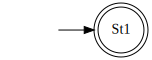

In [8]:
dotObj_nfa(re2nfa("''"))

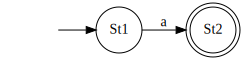

In [9]:
dotObj_nfa(re2nfa("a"))

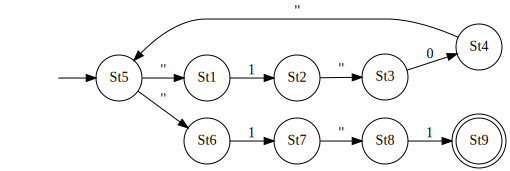

In [10]:
dotObj_nfa(re2nfa("  (10)* (11)  "))

In [11]:
re2nfa("  (10)* (11)  ")

{'Delta': {('St1', '1'): {'St2'},
  ('St2', ''): {'St3'},
  ('St3', '0'): {'St4'},
  ('St4', ''): {'St5'},
  ('St5', ''): {'St1', 'St6'},
  ('St6', '1'): {'St7'},
  ('St7', ''): {'St8'},
  ('St8', '1'): {'St9'}},
 'F': {'St9'},
 'Q': {'St1', 'St2', 'St3', 'St4', 'St5', 'St6', 'St7', 'St8', 'St9'},
 'Q0': {'St5'},
 'Sigma': {'0', '1'}}

In [15]:
NFA1 = re2nfa("   (a+b+c)(p+q)*(m+n) " )

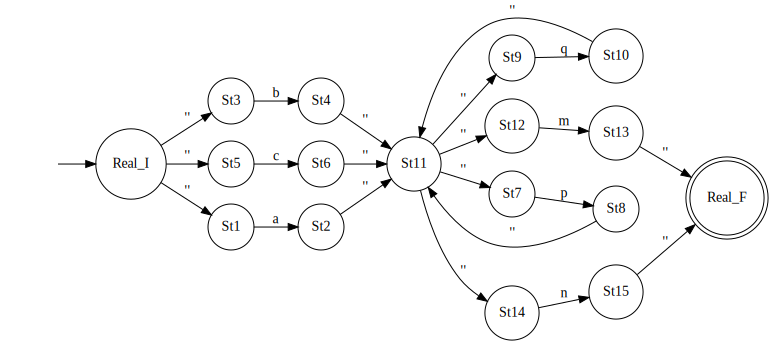

In [18]:
dotObj_nfa(mk_gnfa(NFA1))

In [20]:
GNFA1 = mk_gnfa(NFA1)

In [21]:
(Gnfa_fina, DO, REfinal) = del_gnfa_states(GNFA1)

**** Eliminating state St3 ****
**** Eliminating state St4 ****
**** Eliminating state St2 ****
**** Eliminating state St5 ****
**** Eliminating state St8 ****
**** Eliminating state St12 ****
**** Eliminating state St1 ****
**** Eliminating state St15 ****
**** Eliminating state St10 ****
**** Eliminating state St9 ****
**** Eliminating state St14 ****
**** Eliminating state St6 ****
**** Eliminating state St7 ****
**** Eliminating state St11 ****
**** Eliminating state St13 ****


In [22]:
REfinal

'(((((c + ((a + b) + b)) + ((a + b) + b)) ((((p + q) + q))* m)) + (((c + ((a + b) + b)) + ((a + b) + b)) ((((p + q) + q))* n))) + (((c + ((a + b) + b)) + ((a + b) + b)) ((((p + q) + q))* n)))'

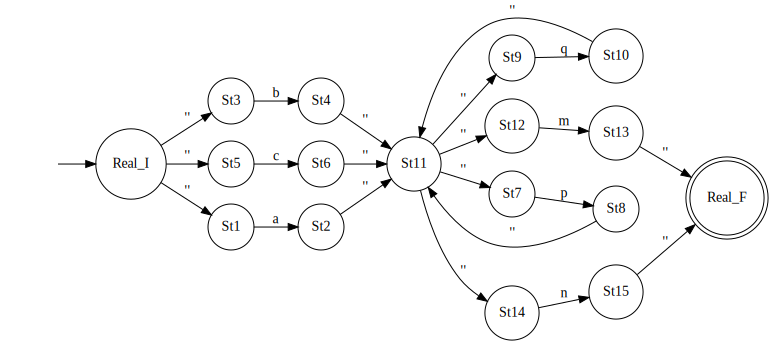

In [23]:
DO[0]

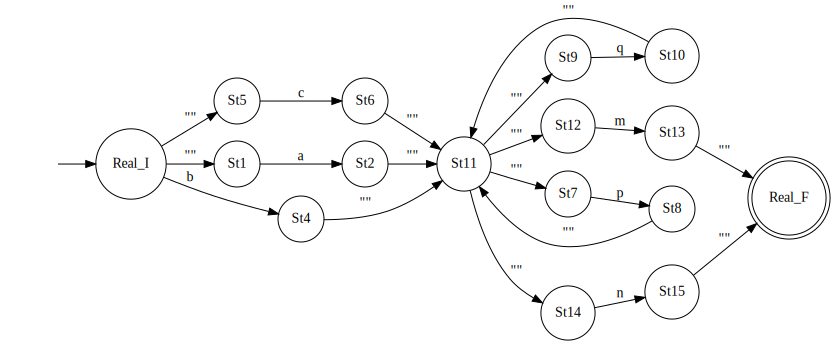

In [24]:
DO[1]

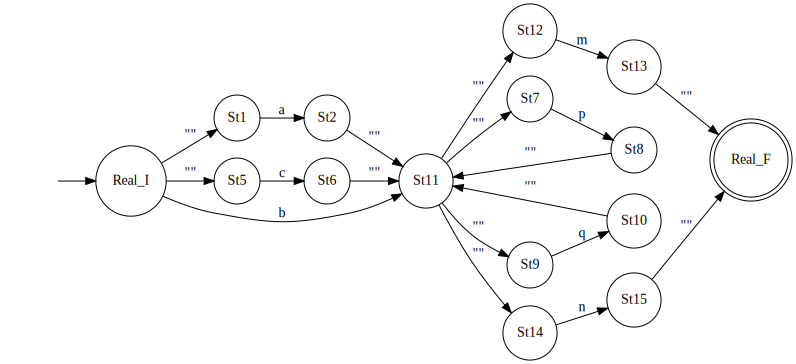

In [25]:
DO[2]

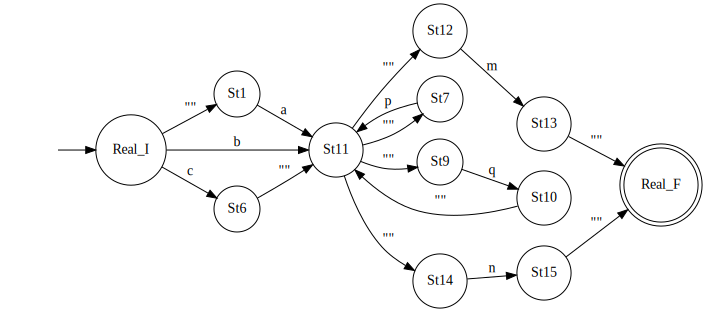

In [26]:
DO[5]

In [28]:
len(DO)

16

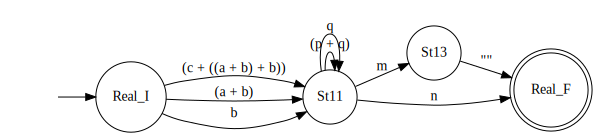

In [29]:
DO[13]

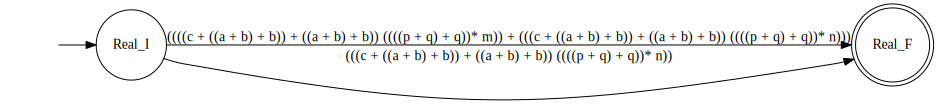

In [30]:
DO[15]

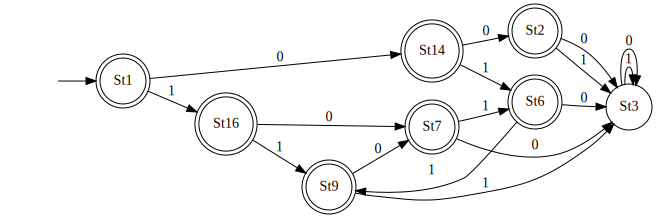

In [32]:
dotObj_dfa(comp_dfa(min_dfa(nfa2dfa(re2nfa(" (1+0)*(111+000+100+010+001)(1+0)* ")))))

An NFA is a machine $(Q, \Sigma, \delta, Q_0, F)$ which is somewhat like a DFA 
except that 

1. It can start from a __set__ of starting states $Q_0$
    > i.e., the NFA can start from more than one starting state
    
2. Its transition function $\delta$ maps $Q\times (\Sigma\cup \{\varepsilon\})$ to $2^{Q}$
    > i.e., the NFA takes a state $Q$ and a symbol and returns a set of states
    
You can see these aspects being illustrated in the NFA to follow

# RE to NFA

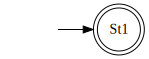

In [4]:
dotObj_nfa(re2nfa("''"))

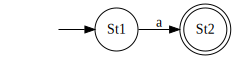

In [6]:
dotObj_nfa(re2nfa("a"))

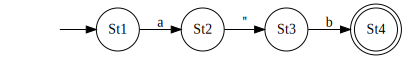

In [7]:
dotObj_nfa(re2nfa("ab"))

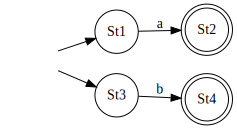

In [8]:
dotObj_nfa(re2nfa("a+b"))

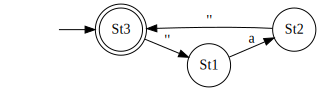

In [9]:
dotObj_nfa(re2nfa("a*"))

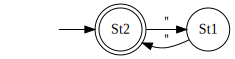

In [10]:
dotObj_nfa(re2nfa("''*"))

In [15]:
nfromr = re2nfa("ab(a+b)*")

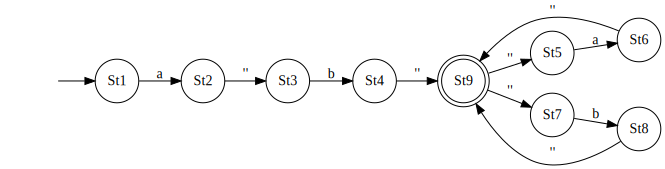

In [16]:
dotObj_nfa(nfromr)

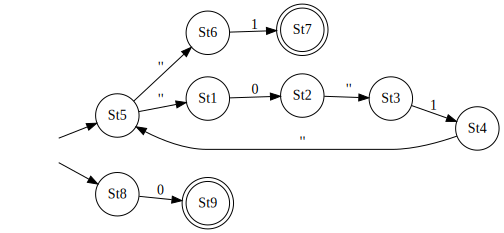

In [17]:
dotObj_nfa(re2nfa("(01)*1+0"))

# NFA to RE

In [18]:
mk_gnfa

<function Imports.Def_NFA2RE.mk_gnfa>

In [19]:
help(mk_gnfa)

Help on function mk_gnfa in module Imports.Def_NFA2RE:

mk_gnfa(Nin)
    Input : Nin, an NFA.
    Output: G, a GNFA, with at-most one transition from any
            state p to a state q.??true any more?? Note that we have created
            an NFA (G+NFA), and so one state can have a transition
            to A SET OF STATES !!
    Method: Add a new set of states {Real_I} and another, {Real_F}.
            Move from state Real_I to the NFA's initial set of states
            upon epsilon, and from each state in NFA's F to Real_F.
            Return this GNFA.
            We will keep GNFA's alphabet implicit (whatever edge
            labels exist will be deemed to be in the alphabet.)



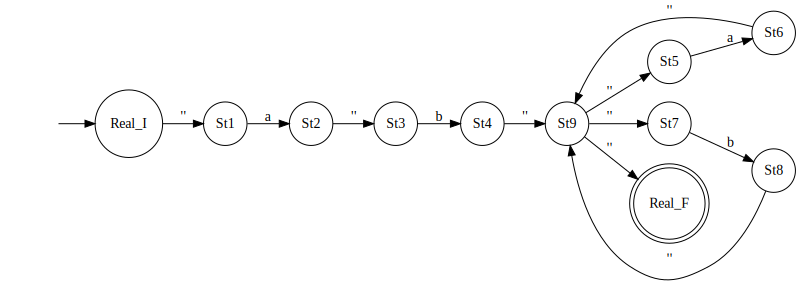

In [20]:
gnfromr = mk_gnfa(nfromr)
dotObj_gnfa(gnfromr)

In [21]:
del_gnfa_states

<function Imports.Def_NFA2RE.del_gnfa_states>

In [22]:
help(del_gnfa_states)

Help on function del_gnfa_states in module Imports.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



In [24]:
(Gf, DO, RE) = del_gnfa_states(gnfromr)

**** Eliminating state St5 ****
**** Eliminating state St4 ****
**** Eliminating state St2 ****
**** Eliminating state St3 ****
**** Eliminating state St9 ****
**** Eliminating state St6 ****
**** Eliminating state St7 ****
**** Eliminating state St8 ****
**** Eliminating state St1 ****


In [25]:
RE

'(((((((((a b) a) (a)*) + (a b)) + (a b)) b) ((((((a (a)*) + "") + "") b))* (((a (a)*) + "") + ""))) + (((((a b) a) (a)*) + (a b)) + (a b))) + (((((a b) a) (a)*) + (a b)) + (a b)))'

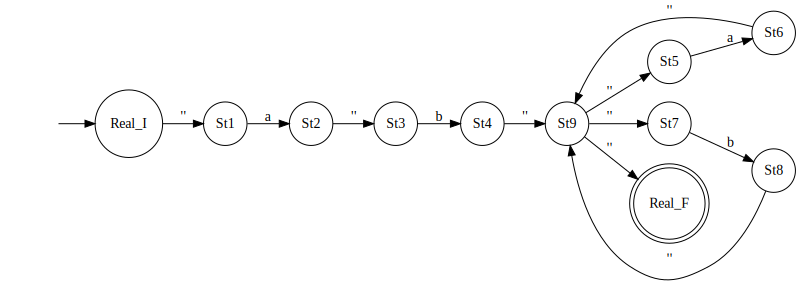

In [26]:
DO[0]

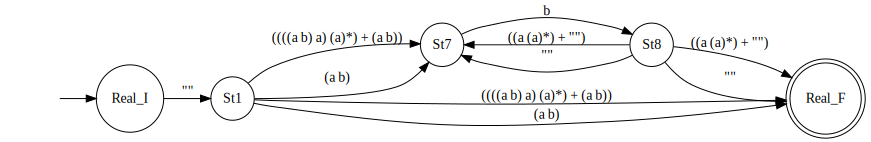

In [27]:
DO[6]

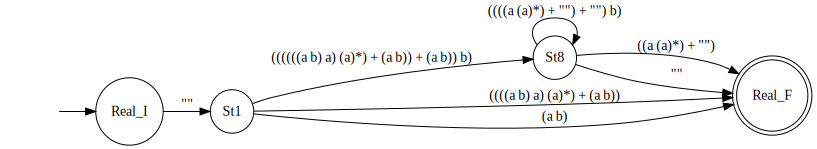

In [28]:
DO[7]

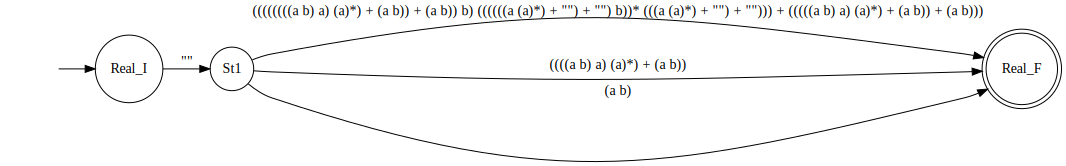

In [29]:
DO[8]

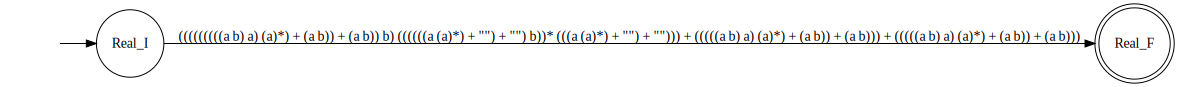

In [30]:
DO[9]

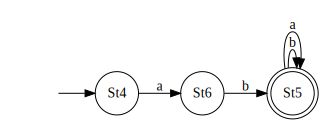

In [31]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(RE))))

In [3]:
min_dfa

<function Imports.Def_DFA.min_dfa>

In [4]:
min_dfa_brz

<function Imports.Def_NFA.min_dfa_brz>